In [12]:
# 下载数据集
#!wget http://labfile.oss.aliyuncs.com/courses/1081/challenge-2-bitcoin.csv

In [13]:
#挑战：使用 Pandas 加载数据集 CSV 文件，并预览前 5 行数据。
import pandas as pd
df=pd.read_csv("challenge-2-bitcoin.csv")
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24 00:00:00,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25 00:00:00,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26 00:00:00,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27 00:00:00,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,...,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


In [14]:
#挑战：分离出仅包含 btc_market_price，btc_total_bitcoins，btc_transaction_fees 列的 DataFrame，并定义为变量 data
data=df[['btc_market_price','btc_total_bitcoins','btc_transaction_fees']]
data.head()

,btc_market_price,btc_total_bitcoins,btc_transaction_fees
0,0.0,2110700.0,0.0
1,0.0,2120200.0,0.0
2,0.0,2127600.0,0.0
3,0.0,2136100.0,0.0
4,0.0,2144750.0,0.0


Text(0,0.5,'btc_transaction_fees')

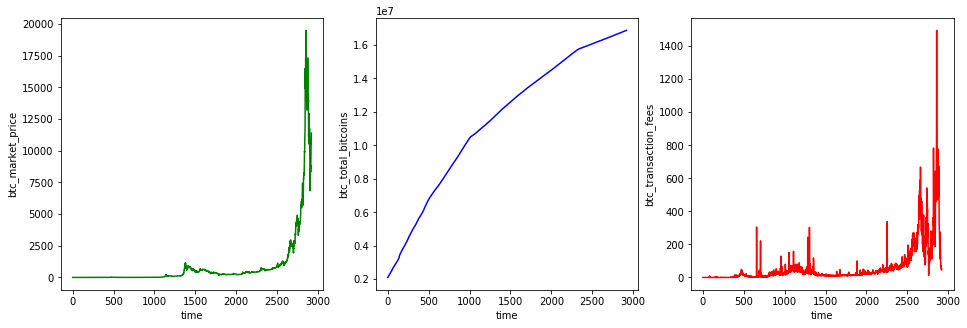

In [15]:
#挑战：分别绘制 data 数据集 3 列数据的线形图，并以横向子图排列。
"""绘制数据图像
"""
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

temp_bitcoins=data['btc_total_bitcoins']
temp_price=data['btc_market_price']
temp_fees=data['btc_transaction_fees']

### 代码开始 ### (≈ 9 行代码)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(temp_price,'g') 
#ax1.set_title("title")
ax1.set_xlabel("time")
ax1.set_ylabel("btc_market_price")
ax2.plot(temp_bitcoins,'b')
ax2.set_xlabel("time")
ax2.set_ylabel("btc_total_bitcoins")
ax3.plot(temp_fees,'r')
ax3.set_xlabel("time")
ax3.set_ylabel("btc_transaction_fees")

In [16]:
#挑战：划分 data 数据集，使得训练集占 70%，而测试集占 30%。
"""划分数据集函数
"""
def split_dataset():
    """
    参数:
    无
    返回:
    train_x, train_y, test_x, test_y -- 训练集特征、训练集目标、测试集特征、测试集目标
    """
    
    ### 代码开始 ### (≈ 6 行代码)
    # 首先划分 dateframe 为训练集和测试集
    train_df = df[:int(len(df)*0.7)] 
    test_df = df[int(len(df)*0.7):]
    
    # 定义训练和测试使用的自变量和因变量
    train_x = train_df[['btc_total_bitcoins','btc_transaction_fees']].values
    train_y = train_df[['btc_market_price']].values
    test_x = test_df[['btc_total_bitcoins','btc_transaction_fees']].values
    test_y = test_df[['btc_market_price']].values
    
    ### 代码结束 ###
    
    return train_x, train_y, test_x, test_y
#(2043, 2043, 877, 877, (2043, 2), (2043, 1), (877, 2), (877, 1))


In [17]:
len(split_dataset()[0]), len(split_dataset()[1]), len(split_dataset()[2]), len(split_dataset()[3]), split_dataset()[0].shape, split_dataset()[1].shape, split_dataset()[2].shape, split_dataset()[3].shape

(2043, 2043, 877, 877, (2043, 2), (2043, 1), (877, 2), (877, 1))

In [18]:
#挑战：构建 3 次多项式回归预测模型
# 加载必要模块
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# 加载数据
train_x = split_dataset()[0]
train_y = split_dataset()[1]
test_x = split_dataset()[2]
test_y = split_dataset()[3]

"""3 次多项式回归预测模型
"""
def poly3():
    
    """
    参数:
    无
    返回:
    mae -- 预测结果的 MAE 评价指标
    """
    
    ### 代码开始 ### (≈ 7 行代码)
    poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
    poly_train_x_3 = poly_features_3.fit_transform(train_x.reshape(len(train_x),2))
    poly_test_x_3 = poly_features_3.fit_transform(test_x.reshape(len(test_x),2))

# 3 次多项式回归模型训练与预测
    model = LinearRegression()
    model.fit(poly_train_x_3, train_y.reshape(len(train_x),1)) # 训练模型

    results_3 = model.predict(poly_test_x_3) # 预测结果

    results_3.flatten() # 打印扁平化后的预测结果
    mae=mean_absolute_error(test_y, results_3.flatten())

    ### 代码结束 ###
    
    return mae


In [19]:
poly3()

1955.8027673910474

In [20]:
#挑战：计算 1,2,...,10 次多项式回归预测结果的 MSE 评价指标
"""N 次多项式回归预测模型
"""
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
def poly_plot(N):
 
    """
    参数:
    N -- 标量, 多项式次数
    返回:
    mse -- N 次多项式预测结果的 MSE 评价指标列表
    """
    
    m = 1
    mse = []
    
    ### 代码开始 ### (≈ 6 行代码)
    #mse = [] # 用于存储各最高次多项式 MSE 值
    #m = 1 # 初始 m 值
    m_max = 10 # 设定最高次数
    while m <= m_max:
        model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
        model.fit(train_x, train_y) # 训练模型
        pre_y = model.predict(test_x) # 测试模型
        mse.append(mean_squared_error(test_y, pre_y.flatten())) # 计算 MSE
        m = m + 1

    ### 代码结束 ###
    
    return mse
#运行测试：
#poly_plot(10)[:10:3]
#期望输出（结果可能会稍有出入）：
#[24171680.63629423, 23772159.453013, 919854753.0234015, 3708858661.222856]


In [21]:
poly_plot(10)[:10:3]

[24171680.63629423, 23772220.680903375, 933785690.8115816, 3696652823.6691833]

Text(0,0.5,'MSE')

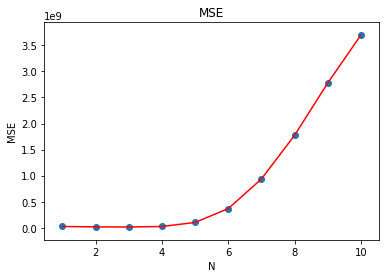

In [22]:
#挑战：将 MSE 评价指标绘制成线型图
#要求：将 poly_plot(10) 返回的 MSE 列表绘制成组合图（线形图+散点图）。其中，线型图为红色
m_max = 10 # 设定最高次数
mse = poly_plot(10)
### 代码开始 ### (≈ 2 行代码)
plt.plot([i for i in range(1, m_max + 1)], mse, 'r')
plt.scatter([i for i in range(1, m_max + 1)], mse)
### 代码结束 ###
plt.title("MSE")
plt.xlabel("N")
plt.ylabel("MSE")
